In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.decomposition import PCA

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movierankingsmall/ml-latest-small/movies.csv
/kaggle/input/movierankingsmall/ml-latest-small/ratings.csv
/kaggle/input/movierankingsmall/ml-latest-small/README.txt
/kaggle/input/movierankingsmall/ml-latest-small/tags.csv
/kaggle/input/movierankingsmall/ml-latest-small/links.csv


In [2]:
movies = pd.read_csv("../input/movierankingsmall/ml-latest-small/movies.csv")
ratings = pd.read_csv("../input/movierankingsmall/ml-latest-small/ratings.csv")
#print(ratings['userId'])
dict_id={}
k=1
for i in movies['movieId']:
    dict_id[k]=i
    k=k+1
#print(dict_id)
dict_id_keys=dict_id.keys()
dict_id_values=dict_id.values()
dict_id_keys_list=[]
dict_id_values_list=[]
for i in dict_id_keys:
    dict_id_keys_list.append(i)
for i in dict_id_values:
    dict_id_values_list.append(i)
#print(dict_id_keys)
#print(dict_id_values)
ratings_set=set(ratings['userId'])
#print(len(ratings_set))
#print(len(movies['movieId']))
A=[[-1.0]* (len(movies['movieId']))]*(len(ratings_set))
A=np.array(A)
#print(ratings['rating'][0])

for i in range(len(ratings)):
    k=ratings['userId'][i]
    j=ratings['movieId'][i]
    m=dict_id_values_list.index(j)
    n=dict_id_keys_list[m]
    A[k-1][n-1]=ratings['rating'][i]
print(A)
    
    

[[ 4.  -1.   4.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 [-1.  -1.  -1.  ... -1.  -1.  -1. ]
 ...
 [ 2.5  2.   2.  ... -1.  -1.  -1. ]
 [ 3.  -1.  -1.  ... -1.  -1.  -1. ]
 [ 5.  -1.  -1.  ... -1.  -1.  -1. ]]


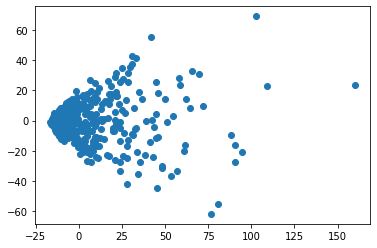

[0.13765798 0.04413443]


In [3]:
import matplotlib.pyplot as plt
pca=PCA(n_components=2)
principal_components=pca.fit_transform(A)
pdf=pd.DataFrame(principal_components, columns=['pc1','pc2'])
plt.scatter(pdf.pc1,pdf.pc2)
plt.show()
print(pca.explained_variance_ratio_)

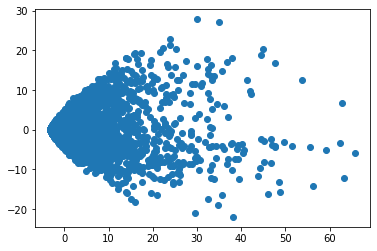

[0.17648039 0.04230572]


In [4]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(A.T)
pdf=pd.DataFrame(principal_components, columns=['pc1','pc2'])
plt.scatter(pdf.pc1,pdf.pc2)
plt.show()
print(pca.explained_variance_ratio_)